# Visualizing Data from Cyton Board

The sample rate of the cyton board is 250 Hz. When samples are taken for 1 second, the resulting numpy array has about 130 rows on average. 'On Average' because the number of rows for each run are not always consistent.



## Importing all the libraries we need for this

In [21]:
import time
import os
from collections import deque
import cv2
import tensorflow as tf
import random

# environment manipulation
from pathlib import Path


# ml libraries
import numpy as np
import pandas as pd

# import brainflow
# from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
# from brainflow.data_filter import DataFilter, FilterTypes, AggOperations


# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Loading saved data

Loading a saved numpy file from earlier and casting it as a Dataframe for better visibility during manipulation and visualization. 

In [22]:
# import a numpy from the environment
stored_data = np.loadtxt('../FullData/Backward/1631923984.npy', delimiter=",")

In [23]:
stored_data

array([[ 1.00000000e+00, -1.95124024e+04, -1.05850262e+04, ...,
         0.00000000e+00,  1.63192398e+09,  0.00000000e+00],
       [ 2.00000000e+00, -1.94088467e+04, -1.05438990e+04, ...,
         0.00000000e+00,  1.63192398e+09,  0.00000000e+00],
       [ 3.00000000e+00, -1.95221701e+04, -1.07476352e+04, ...,
         0.00000000e+00,  1.63192398e+09,  0.00000000e+00],
       ...,
       [ 1.88000000e+02, -2.00146684e+04, -1.16996630e+04, ...,
         0.00000000e+00,  1.63192398e+09,  0.00000000e+00],
       [ 1.89000000e+02, -1.99969211e+04, -1.16482987e+04, ...,
         0.00000000e+00,  1.63192398e+09,  0.00000000e+00],
       [ 1.90000000e+02, -1.98358097e+04, -1.14855780e+04, ...,
         0.00000000e+00,  1.63192398e+09,  0.00000000e+00]])

In [24]:
homemade_columns = []
for i in range(1, 25):
    num = "c" + str(i)
    homemade_columns.append(num)
    
print (homemade_columns)
    

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24']


In [25]:
# put it in a dataframe
data = pd.DataFrame(stored_data, columns=homemade_columns)

In [26]:
data.head()


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,1.0,-19512.402357,-10585.026215,-109908.087243,-118478.640137,-101004.180432,-59398.889172,-50848.788124,-48133.721725,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
1,2.0,-19408.846725,-10543.899005,-110018.884840,-117783.344422,-103543.383305,-61710.439528,-51586.418043,-49101.060522,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
2,3.0,-19522.170069,-10747.635156,-106789.460097,-117374.799237,-98717.865195,-58357.566101,-49990.279971,-47520.278099,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
3,4.0,-19648.055094,-10875.621244,-106324.275592,-118038.154309,-95636.453704,-55742.166131,-49069.835135,-46403.920222,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
4,5.0,-19555.362410,-10753.580720,-109428.374103,-118500.880122,-100010.555984,-58665.707250,-50502.425492,-47798.534965,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0


## Heat map on a random 2D numpy

In [27]:
# Examplar heat map on a nonsense dataset
nonsense_2d = np.linspace(1, 5, 12).reshape(4, 3) 

print(nonsense_2d)

[[1.         1.36363636 1.72727273]
 [2.09090909 2.45454545 2.81818182]
 [3.18181818 3.54545455 3.90909091]
 [4.27272727 4.63636364 5.        ]]


<AxesSubplot:>

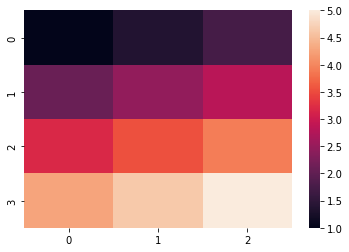

In [28]:
sns.heatmap(nonsense_2d)

## Heat map on BCI data

In [29]:
# Using EEG signals now:
indexed_data = data.set_index('c1') # <--- make c1 index
indexed_data = data.drop([0.0])     # <--- drop first row, it's all zero's anyway
indexed_data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
1,2.0,-19408.846725,-10543.899005,-110018.884840,-117783.344422,-103543.383305,-61710.439528,-51586.418043,-49101.060522,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
2,3.0,-19522.170069,-10747.635156,-106789.460097,-117374.799237,-98717.865195,-58357.566101,-49990.279971,-47520.278099,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
3,4.0,-19648.055094,-10875.621244,-106324.275592,-118038.154309,-95636.453704,-55742.166131,-49069.835135,-46403.920222,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
4,5.0,-19555.362410,-10753.580720,-109428.374103,-118500.880122,-100010.555984,-58665.707250,-50502.425492,-47798.534965,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0
5,6.0,-19429.209164,-10635.988192,-110351.367039,-117940.521889,-103692.134165,-61746.403485,-51610.759093,-49125.781551,-0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.631924e+09,0.0


In [30]:
# remove none EEG data
indexed_key_data = data.drop(columns=['c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24'])

indexed_key_data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,1.0,-19512.402357,-10585.026215,-109908.087243,-118478.640137,-101004.180432,-59398.889172,-50848.788124,-48133.721725
1,2.0,-19408.846725,-10543.899005,-110018.884840,-117783.344422,-103543.383305,-61710.439528,-51586.418043,-49101.060522
2,3.0,-19522.170069,-10747.635156,-106789.460097,-117374.799237,-98717.865195,-58357.566101,-49990.279971,-47520.278099
3,4.0,-19648.055094,-10875.621244,-106324.275592,-118038.154309,-95636.453704,-55742.166131,-49069.835135,-46403.920222
4,5.0,-19555.362410,-10753.580720,-109428.374103,-118500.880122,-100010.555984,-58665.707250,-50502.425492,-47798.534965


<AxesSubplot:>

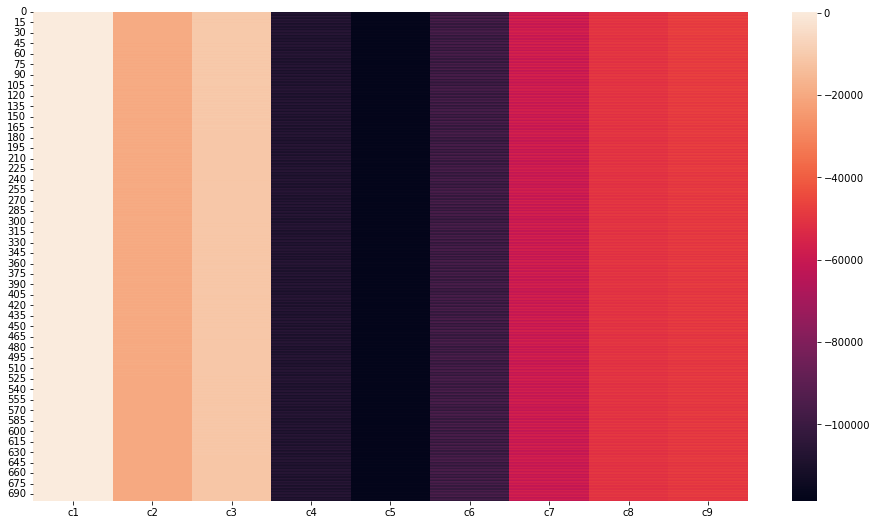

In [31]:
# create heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(indexed_key_data)

## Scaling (but it's exactly the same).

In [32]:
scaled_data = tf.keras.utils.normalize(stored_data, axis=-1) 

In [33]:
scaled_data = pd.DataFrame(scaled_data, columns=homemade_columns)

In [34]:
scaled_data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,6.127736e-10,-0.000012,-0.000006,-0.000067,-0.000073,-0.000062,-0.000036,-0.000031,-0.000029,-9.804378e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.225547e-09,-0.000012,-0.000006,-0.000067,-0.000072,-0.000063,-0.000038,-0.000032,-0.000030,-9.804378e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.838321e-09,-0.000012,-0.000007,-0.000065,-0.000072,-0.000060,-0.000036,-0.000031,-0.000029,-9.804378e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.451095e-09,-0.000012,-0.000007,-0.000065,-0.000072,-0.000059,-0.000034,-0.000030,-0.000028,-9.804378e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.063868e-09,-0.000012,-0.000007,-0.000067,-0.000073,-0.000061,-0.000036,-0.000031,-0.000029,-9.804378e-12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Using EEG signals now:
scaled_indexed_data = scaled_data.set_index('c1') # <--- make c1 index
scaled_indexed_data = scaled_data.drop([0.0])     # <--- drop first row, it's all zero's anyway
# remove none EEG data
scaled_indexed_key_data = scaled_data.drop(columns=['c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24'])
scaled_indexed_key_data.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,6.127736e-10,-0.000012,-0.000006,-0.000067,-0.000073,-0.000062,-0.000036,-0.000031,-0.000029
1,1.225547e-09,-0.000012,-0.000006,-0.000067,-0.000072,-0.000063,-0.000038,-0.000032,-0.000030
2,1.838321e-09,-0.000012,-0.000007,-0.000065,-0.000072,-0.000060,-0.000036,-0.000031,-0.000029
3,2.451095e-09,-0.000012,-0.000007,-0.000065,-0.000072,-0.000059,-0.000034,-0.000030,-0.000028
4,3.063868e-09,-0.000012,-0.000007,-0.000067,-0.000073,-0.000061,-0.000036,-0.000031,-0.000029


<AxesSubplot:>

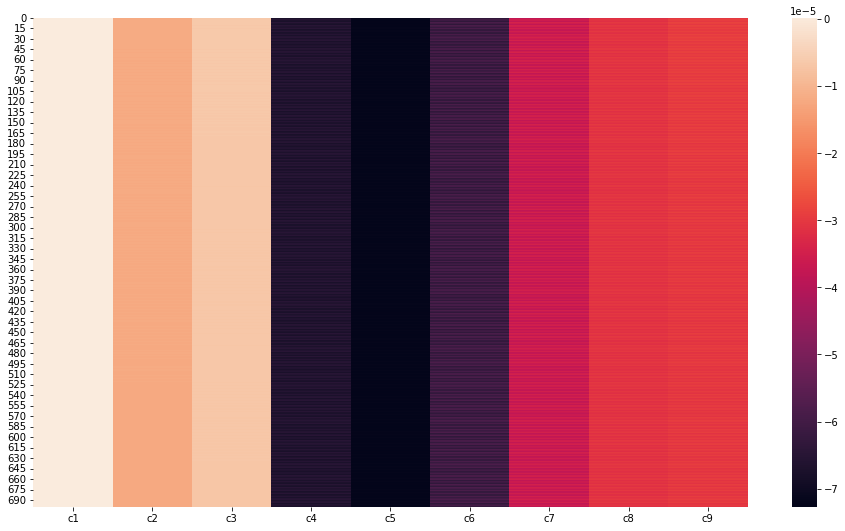

In [36]:
# create heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(scaled_indexed_key_data)

## Scaling using SkLearn MinMaxScaler() ...

The data for each channel is scaled locally between 0 and 1. 

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_indexed_key_data = scaler.fit_transform(np.array(indexed_key_data))
scaled_indexed_key_data = pd.DataFrame(scaled_indexed_key_data, columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'])
scaled_indexed_key_data.drop(columns=['c0'], inplace=True)

scaled_indexed_key_data.head()

,c1,c2,c3,c4,c5,c6,c7,c8
0,0.836803,0.965255,0.148910,0.103460,0.317501,0.452480,0.324723,0.581076
1,1.000000,1.000000,0.125725,0.668180,0.029154,0.106372,0.065628,0.346805
2,0.821410,0.827879,0.801506,1.000000,0.577130,0.608397,0.626278,0.729640
3,0.623023,0.719754,0.898849,0.461223,0.927049,1.000000,0.949588,1.000000
4,0.769101,0.822856,0.249294,0.085397,0.430335,0.562259,0.446385,0.662251


<AxesSubplot:>

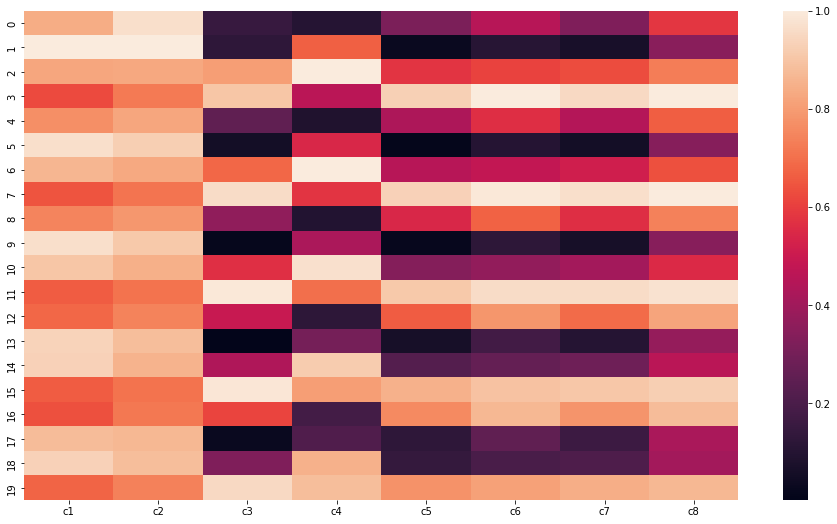

In [38]:
# create heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(scaled_indexed_key_data.head(20))

<AxesSubplot:>

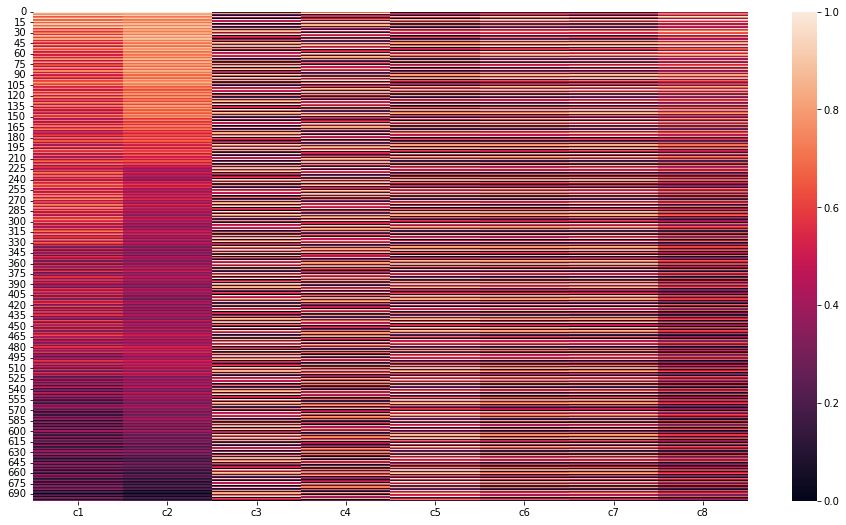

In [39]:
# create heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(scaled_indexed_key_data)